# Lending Club Case Study

### PROBLEM STATEMENT:
    
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Use Exploratory Data Analysis techniques (Univariate and Bivariate analysis) on the data provided to understand how consumer attributes and loan attributes influence the tendency of the default.

### Step 1: Data Understanding and Preliminary Analysis

Load the dataset and take a look at the first few rows to understand its structure and contents.
Check for the data types of different columns, missing values, and basic summary statistics.

In [9]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [13]:
#read the dataset and check the first five rows
df = pd.read_csv("loan.csv", sep=',')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
#Check the shape of the dataframe
df.shape

(39717, 111)

#### Data Handling and Cleaning

In [20]:
#Check the datatypes of all the columns of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [29]:
#Check the number of null values in the columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [31]:
#Print the presentage of missing value

round(df.isnull().sum()/len(df.index) * 100)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [35]:
missing_cols= df.columns[round(df.isnull().sum()/len(df.index) * 100) > 90]
print (missing_cols)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [36]:
#### Drop the columns with values missing for more than 90% rows

In [37]:
df = df.drop(missing_cols, axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [39]:
round(df.isnull().sum()/len(df.index) * 100)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [42]:
### Verify the columns that have misssing values desc and mths_since_last_delinq

df[['desc','mths_since_last_delinq']]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


The desc column contains the free text. For the EDA related analysis, this column values will not be of any help unless we do NLP related work. Let us drop those columns

In [44]:
df.drop(['desc','mths_since_last_delinq'],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## Data analysis

Manually validate the data to see if any column that require transformations

In [45]:
## reformat the int_rate column by removing % to perform mathematical operations

print( df["int_rate"].apply(lambda x: float(x[:-1])) )

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64


In [46]:
df["int_rate"] = df["int_rate"].apply(lambda x: float(x[:-1])) 

In [47]:
df["int_rate"].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [48]:
# reformat emp_legth

## drop the missing values from emp_length

df['emp_length'].isnull().sum()

1075

In [49]:
df = df[~df['emp_length'].isnull()  ]

In [50]:
df['emp_length'].isnull().sum()

0

In [56]:
import re

df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0]).astype(int)

In [57]:
df['emp_length'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38642 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype
--------------  -----
38642 non-null  int64
dtypes: int64(1)
memory usage: 603.8 KB


##### Based on the observation, let us shortlist the columns that are needed for further analysis

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [68]:
#In the data, the behaviour variable value is generated once after the loan is approved,  Hence these column s are required for our analysis

behaviour_var = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
                'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [69]:
#behaviour_var

df.drop(behaviour_var, axis=1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [73]:
#Let us also drop the address and URL related variable and this is not needed for analysis

#Since purpose and title looks same, we will drop the title

df = df.drop(['title','zip_code','url','addr_state'],axis=1)

In [75]:

#Analysis on the loan_status column and see the value counts

df['loan_status'] = df['loan_status'].astype('category')

In [76]:
df['loan_status'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38642 entries, 0 to 39716
Series name: loan_status
Non-Null Count  Dtype   
--------------  -----   
38642 non-null  category
dtypes: category(1)
memory usage: 1.3 MB


In [77]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [83]:
#In this case we only have three categories in the loan status.
#Current customers are ongoing paying customers, from whom we cannot find any patterns. So drop those rows

df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)

In [85]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current            0
Name: loan_status, dtype: int64

In [86]:
df[df['loan_status'] == 'Current']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


### Start Univariate Analysis

Lets take the look at the loan_amount with a bar chart and histogram

<Axes: xlabel='loan_amnt', ylabel='Density'>

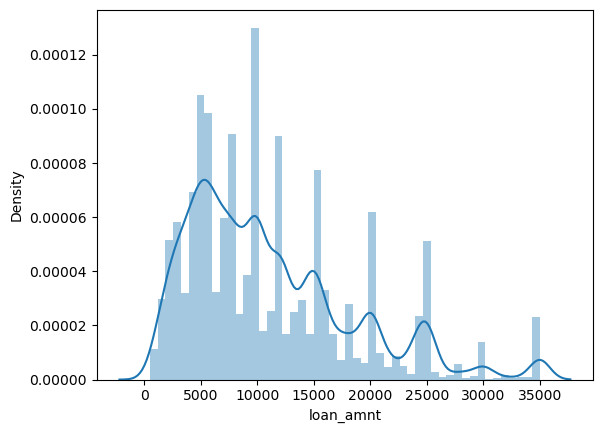

In [89]:
sns.distplot(df['loan_amnt'])

<Axes: >

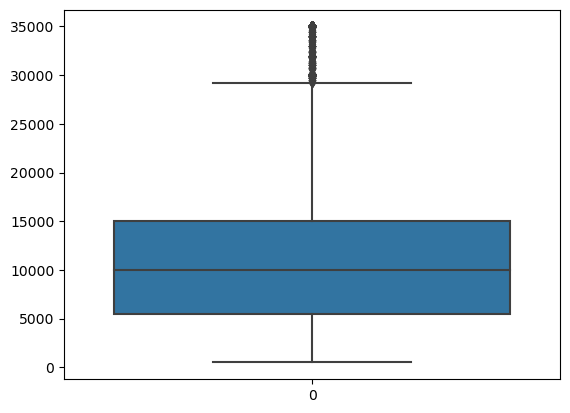

In [91]:
sns.boxplot(df['loan_amnt'])

Lets take the look at the interest rate with a box chart and histogram

<Axes: xlabel='int_rate', ylabel='Density'>

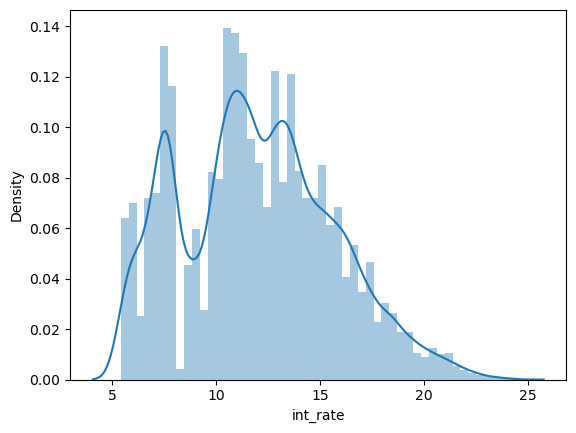

In [93]:
sns.distplot(df['int_rate'])

Here the peak means the most common interest rate offered to the customer, this helps us to identify the clusters 

<Axes: >

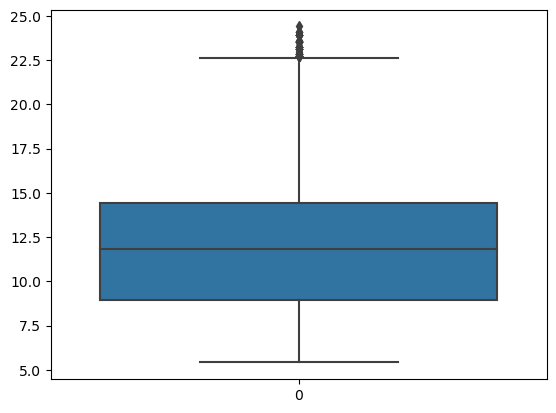

In [95]:
sns.boxplot(df['int_rate'])

### Bivariate analysis


Lets do a bivariate analysis to see how the key columns correlate with each other

Starting with loan_status and interest rate

<Axes: xlabel='loan_status', ylabel='int_rate'>

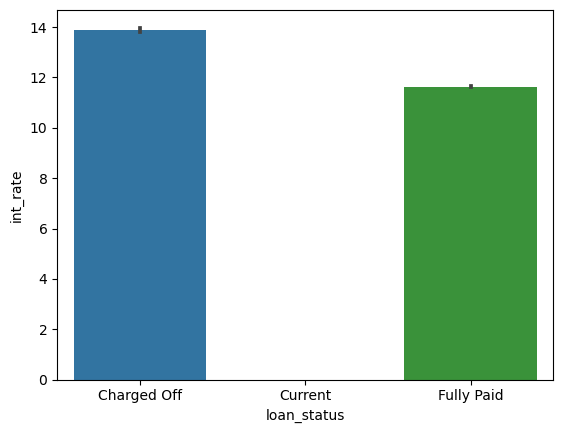

In [105]:
#df = df[ df['loan_status'] != 'Current' ]

sns.barplot(x='loan_status',y='int_rate', data=df)

In [108]:
sns.barplot(x='grade',y='loan_status', data=df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

To avoid this error, let us derive a new integer column based on the loan_status

In [116]:
df['loan_status_num'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [117]:
df['loan_status_num'].value_counts()

0    32145
1     5399
Name: loan_status_num, dtype: int64

<Axes: xlabel='grade', ylabel='loan_status_num'>

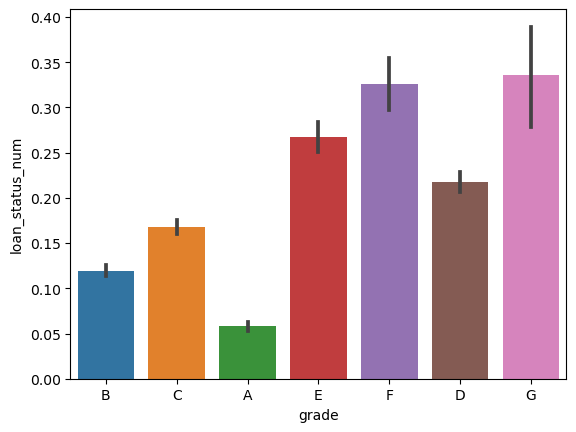

In [118]:
sns.barplot(x='grade',y='loan_status_num', data=df)

<Axes: xlabel='loan_status_num', ylabel='annual_inc'>

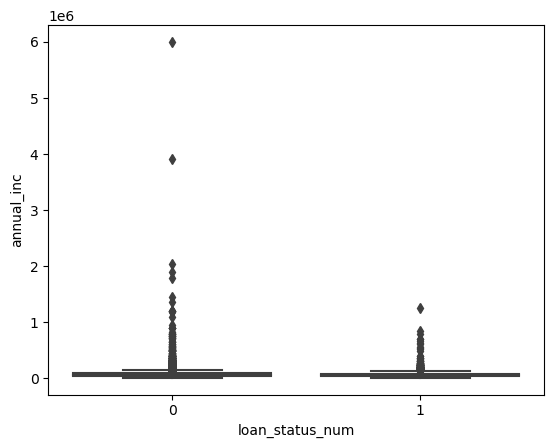

In [121]:
#Analyse the relation between loan_status and salary

sns.boxplot(x='loan_status_num', y='annual_inc', data=df)

In [122]:
#There are several Outlier, which can be filtered to have a better comparison

temp = df [ df['annual_inc'] < 60000 ]

<Axes: xlabel='loan_status_num', ylabel='annual_inc'>

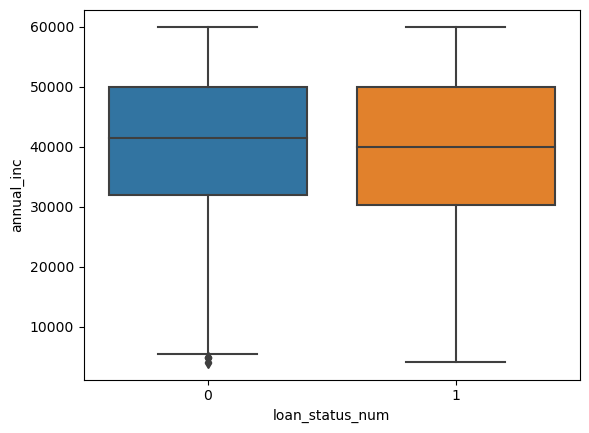

In [123]:
sns.boxplot(x='loan_status_num', y='annual_inc', data=temp)

<Axes: xlabel='loan_status_num', ylabel='int_rate'>

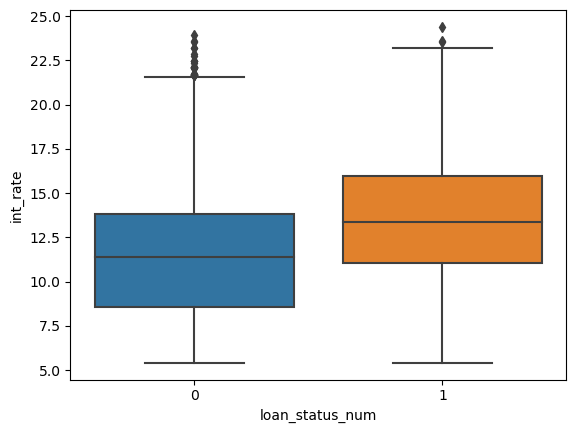

In [124]:
#Lets compare the loan status with interest rate
sns.boxplot(x='loan_status_num', y='int_rate', data=temp)

###### It is clearly seen in the above Box chart whenever the Interest Rate is high there are many defaulters

###### Also the Grade chart clearly give us the visualization that Grade A has less defaulters and it progressively increases with Grade. There is a positive correlation there

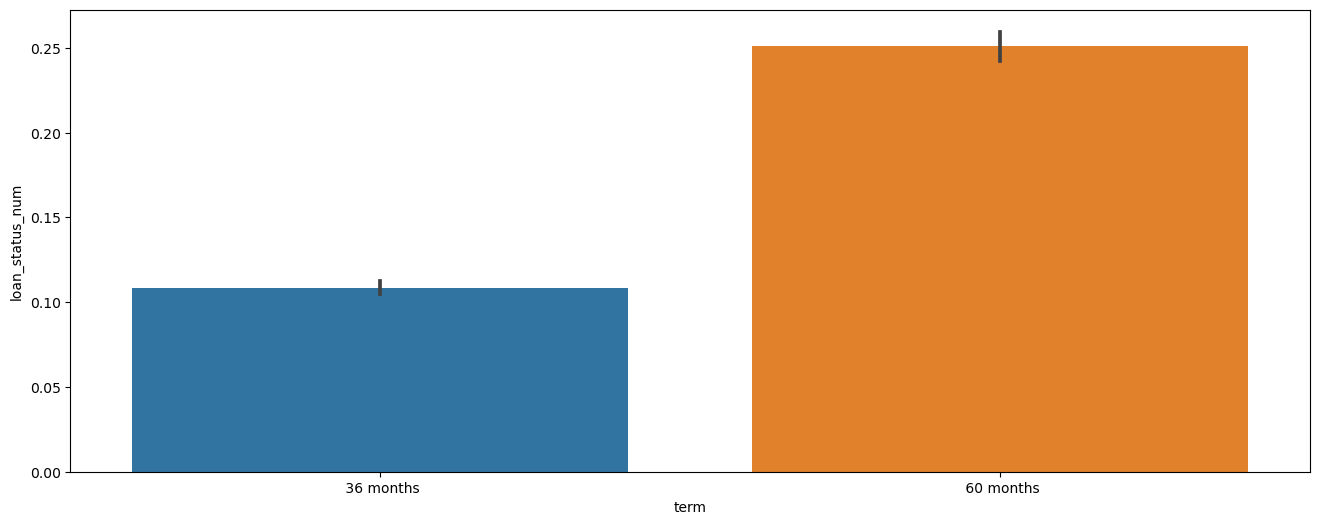

In [129]:
#Lets define a function to plot loan status across different categorical variables

def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status_num', data=df)
    plt.show()

plt.figure(figsize=(16,6))
plot_cat('term')

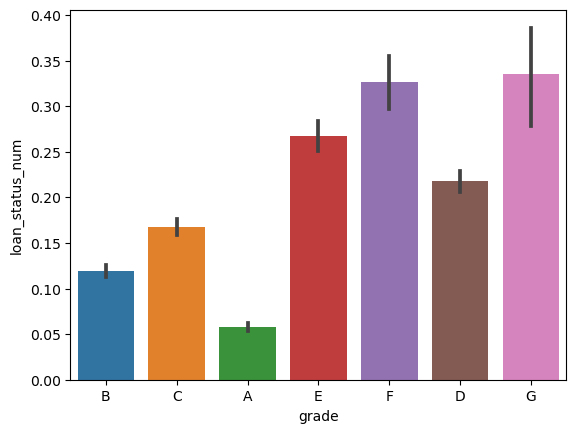

In [130]:
plot_cat('grade')

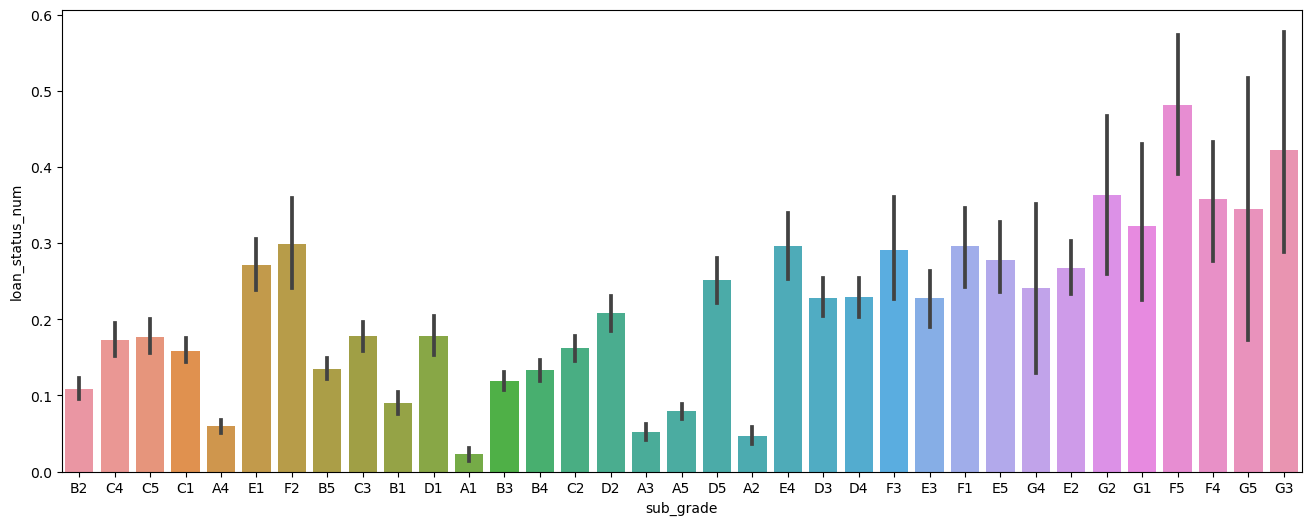

In [132]:
plt.figure(figsize=(16,6))
plot_cat('sub_grade')

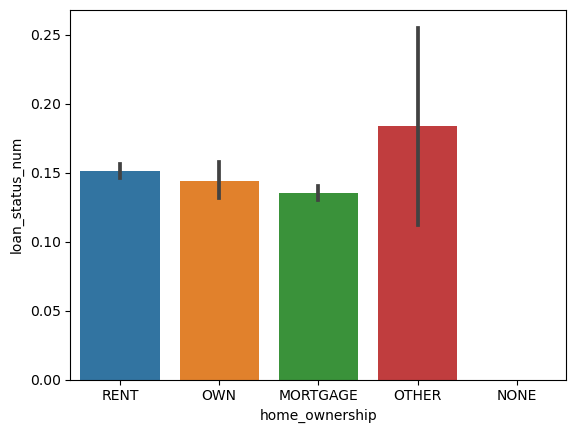

In [133]:
plot_cat('home_ownership')

In [134]:
# The above chart indicates the homeless people are 100% defaulters

In [139]:
#Auto EDA
#pip install sweetviz


In [138]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 6.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [141]:
import sweetviz as sv
sw_report = sv.analyze(df)
sw_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |██| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Conclusion

The Loan status varies with different factors. After performing EDA analysis, it is evidently clear that higer interest rate having more defaulters. Similary the Income and the Grade also have huge impact